<a href="https://colab.research.google.com/github/thessafuzaro/Trabalho_Imagens/blob/main/Classificacao_Imagens_MLPClassifier_GoogleDrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Segundo Projeto de redes neurais
#Processamento de Imagens
#Aluna: Thessa Fuzaro Mendes
#Data: 06/07/2021

In [ ]:
from matplotlib import pyplot as plt  # para fazer graficos
import numpy as np
import pandas as pd #dataframe
import cv2  #biblioteca que trabalha com imagens
import random #gerar numeros aleatorios
import zipfile  #para trabalhar com arquivos zip
from sklearn.neural_network import MLPClassifier #ANN
from sklearn import preprocessing #Normalização dos dados
from sklearn.model_selection import train_test_split  #Separa os dados como treino e teste
from sklearn.metrics import classification_report #Matriz confusão 

In [ ]:
#Importando os arquivos que estão no googledrive
!gdown --id 1vGhpLafB7VP6ozSV_v4Tf0N9a3vKf-DT

Downloading...
From: https://drive.google.com/uc?id=1vGhpLafB7VP6ozSV_v4Tf0N9a3vKf-DT
To: /content/Flowers.zip
214MB [00:02, 106MB/s] 


In [ ]:
#Extraindo os arquivos zip e salvando na variavel X
Arq =['Flowers.zip']  #importando os arquivos
Image_Size=80
Image_Name=[]  #lista em branco para armazenar o nome da imagem
X_Gray=[]  
X_Original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()    #extraindo os arquivos e colocando em uma lista unica com os nomes
  with zipfile.ZipFile(FILE, "r") as f:
      for Name in f.namelist():
          Image_Name.append(Name)
         # print(name)
          X_Gray.append(cv2.resize(cv2.imread(Name, 0),(Image_Size,Image_Size))) #passando a imagem para preto e branco e redimensionando

In [ ]:
#Recuperando o nome com 4 primeiras letras
Y_Names = []
for yy in Image_Name:
  Name = yy[0]+yy[1]+yy[2]+yy[3]
  Y_Names.append(Name)
  #print(Y_Names)

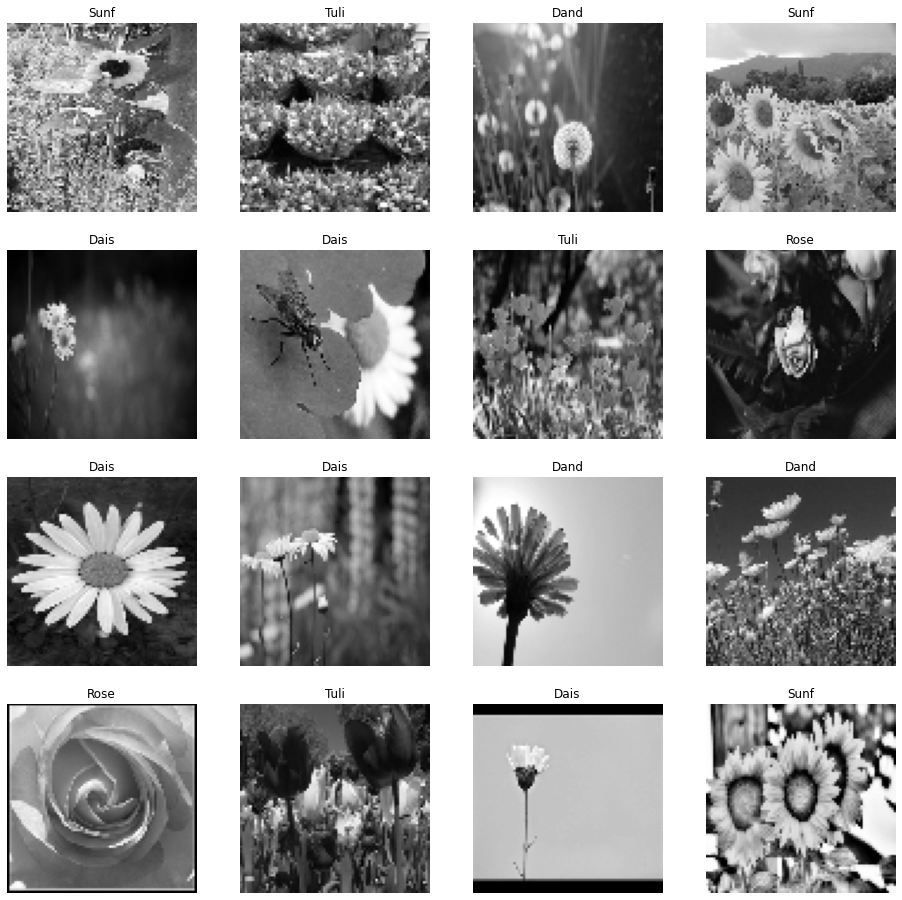

In [ ]:
#Plotando algumas imagens em preto e branco com seus respectivos nomes (4 primeiras letras)
num = len(Y_Names)
plt.figure(figsize=(16,16))
for i in range (16) :
  ax = plt.subplot(4,4,i+1)
  kk = random.randrange(num)
  plt.imshow(X_Gray[kk], cmap='gray')
  plt.title(Y_Names[kk])
  plt.axis("off")

In [ ]:
Unique_List = []      #gera uma lista unica 
for yy in Y_Names:
  if yy not in Unique_List:
    Unique_List.append(yy)

In [ ]:
n = len(Unique_List)  #separa em classes ao inves de nome aparece o índice referente
Y = []
for yy in Y_Names:
  for i in range(n):
    if(yy == Unique_List[i]):
      Y.append(i)

In [ ]:
Unique_List #mostrandoa lista unica

['Dais', 'Dand', 'Rose', 'Sunf', 'Tuli']

In [ ]:
X_Data=[]
for xx in X_Gray:  #lendo  as fotos em preto e branco 
  X_Data.append(xx.ravel())  # cada linha é uma variável dependente 

X = pd.DataFrame(X_Data)

In [ ]:
#Separando os dados em 80% de treino e 20% de teste e misturando os dados
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size=0.50, shuffle=True, random_state=3)

In [ ]:
#Escalonando os dados entre -1 e 1, usando a função preprocessing:
Scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
X_Train = Scaler_X.transform(X_Train)
X_Test = Scaler_X.transform(X_Test)

In [ ]:
#Definindo a rede neural:
model = MLPClassifier(solver='adam',activation='tanh',alpha=1e-5,hidden_layer_sizes=(20),
                      max_iter=1000,random_state=1)
model.fit(X_Train,Y_Train) #Treinando a rede neural

MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#Calculando treino e teste por meio da rede neural
Y_Calc_Train=model.predict(X_Train)
Y_Calc_Test=model.predict(X_Test)

In [ ]:
#Fazendo a matriz confusão para treino
df = pd.DataFrame({'True':Y_Train, 'Calc':Y_Calc_Train})
print(pd.crosstab(df['True'],df['Calc']))

Calc    0    1    2    3    4
True                         
0     356    0    0    0    0
1       0  375    0    0    0
2       0    0  365    0    0
3       0    0    0  373    0
4       0    0    0    0  366


In [ ]:
#Fazendo a matriz confusão para teste
df = pd.DataFrame({'True':Y_Test, 'Calc':Y_Calc_Test})
print(pd.crosstab(df['True'],df['Calc']))

Calc   0    1   2    3   4
True                      
0     80  127  72   51  48
1     73  130  69   36  51
2     62  103  74   67  63
3     44   67  75  109  66
4     67   77  79   65  80


In [ ]:
#Chamando a métrica Classification Report
Y_True = Y_Test #Amazenando os dados de teste em Y_True
Y_Pred = Y_Calc_Test #Armazenando os dados calculados para teste em Y_Pred
Title = ['Tulip','Sunflower','Dandelion','Rose','Daisy']
print(classification_report(Y_True, Y_Pred,target_names=Title))

              precision    recall  f1-score   support

       Tulip       0.25      0.21      0.23       378
   Sunflower       0.26      0.36      0.30       359
   Dandelion       0.20      0.20      0.20       369
        Rose       0.33      0.30      0.32       361
       Daisy       0.26      0.22      0.24       368

    accuracy                           0.26      1835
   macro avg       0.26      0.26      0.26      1835
weighted avg       0.26      0.26      0.26      1835

